In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as linregress

In [4]:
cta_bus_path = r"C:\Users\Kaleb\Chicago_Energy\Travel_data\CTA_Average_Bus_Ridership_1999_2020_1 (1).csv"
cta_rail_path = r"C:\Users\Kaleb\Chicago_Energy\Travel_data\CTA_Average_Rail_Station_Ridership_1999_2020_0 (1).csv"
metra_riders_path = r"C:\Users\Kaleb\Chicago_Energy\Travel_data\Metra_Monthly_Ridership_by_Line_2003_2020_0.csv"
yearly_data_path = r"C:\Users\Kaleb\Chicago_Energy\Travel_data\SYSTEMRIDERSHIP_0.csv"

In [5]:
cta_bus_csv = pd.read_csv(cta_bus_path)
cta_rail_csv = pd.read_csv(cta_rail_path)
metra_riders_csv = pd.read_csv(metra_riders_path)
yearly_data_csv = pd.read_csv(yearly_data_path)

In [4]:
cta_bus = pd.DataFrame(cta_bus_csv)
cta_bus

,ROUTE,MONTH,YEAR,DAY_TYPE_ID,AVG_RIDES
0,0,4.0,2020.0,WK,1340.0
1,0,4.0,2020.0,SAT,766.0
2,0,4.0,2020.0,SUN,666.0
3,1,4.0,2020.0,WK,89.0
4,100,4.0,2020.0,WK,166.0
...,...,...,...,...,...
82914,10,1.0,1999.0,SAT,200.0
82915,25,1.0,1999.0,SAT,158.0
82916,90N,1.0,1999.0,SAT,114.0
82917,25,1.0,1999.0,SUN,111.0


In [5]:
cta_rail = pd.DataFrame(cta_rail_csv)
cta_rail

,NAME,RIDERSHIP_ID,YEAR,MONTH,DAY_TYPE_ID,TOTAL_RIDES,DAILY_AVG_RIDES
0,18th,830,2020,1,WK,36372.0,1653
1,18th,830,2020,1,SUN,3193.0,638
2,18th,830,2020,1,SAT,3712.0,928
3,35-Bronzeville-IIT,1120,2020,1,WK,32031.0,727
4,35-Bronzeville-IIT,1120,2020,1,SUN,2159.0,215
...,...,...,...,...,...,...,...
111703,Western-Ravenswood,1480,1998,12,SUN,3667.0,733
111704,Western-Ravenswood,1480,1998,12,SAT,6034.0,1508
111705,Wilson,540,1998,12,WK,90844.0,4129
111706,Wilson,540,1998,12,SUN,8695.0,1739


In [6]:
metra_df = pd.DataFrame(metra_riders_csv)
metra_df

,NAME,YEAR,MONTH,RIDES,RIDERSHIP_ID
0,Burlington Northern Santa Fe,2020,1,1258782,10
1,Electric District Blue Island Branch,2020,1,21830,4
2,Electric District Main Line,2020,1,518139,5
3,Electric District South Chicago Branch,2020,1,41378,1
4,Heritage Corridor,2020,1,63296,9
...,...,...,...,...,...
2829,Rock Island District,2002,12,738686,6
2830,SouthWest Service,2002,12,132724,8
2831,Union Pacific North Line,2002,12,640236,17
2832,Union Pacific Northwest Line,2002,12,717873,13


In [7]:
cta_rail_df = cta_rail.loc[cta_rail["YEAR"] > 2014]
cta_bus_df = cta_bus.loc[cta_bus["YEAR"] > 2014]


In [8]:
cta_rail_df

,NAME,RIDERSHIP_ID,YEAR,MONTH,DAY_TYPE_ID,TOTAL_RIDES,DAILY_AVG_RIDES
0,18th,830,2020,1,WK,36372.0,1653
1,18th,830,2020,1,SUN,3193.0,638
2,18th,830,2020,1,SAT,3712.0,928
3,35-Bronzeville-IIT,1120,2020,1,WK,32031.0,727
4,35-Bronzeville-IIT,1120,2020,1,SUN,2159.0,215
...,...,...,...,...,...,...,...
27550,Western-Ravenswood,1480,2015,12,SUN,8354.0,1670
27551,Western-Ravenswood,1480,2015,12,SAT,10808.0,2702
27552,Wilson,540,2015,12,WK,117877.0,2679
27553,Wilson,540,2015,12,SUN,11727.0,1172


In [9]:
cta_bus_df

,ROUTE,MONTH,YEAR,DAY_TYPE_ID,AVG_RIDES
0,0,4.0,2020.0,WK,1340.0
1,0,4.0,2020.0,SAT,766.0
2,0,4.0,2020.0,SUN,666.0
3,1,4.0,2020.0,WK,89.0
4,100,4.0,2020.0,WK,166.0
...,...,...,...,...,...
20202,111A,1.0,2015.0,SUN,118.0
20203,165,1.0,2015.0,WK,100.0
20204,169,1.0,2015.0,SAT,37.0
20205,1001,1.0,2015.0,WK,16.0


In [7]:
yearly_transit = pd.DataFrame(yearly_data_csv)
yearly_transit = yearly_transit.loc[yearly_transit["THEYEAR"] > 2014]
yearly_transit

,THEYEAR,CTA_BUS,CTA_RAIL,CTA_TOTAL,METRA,PACE,PACE_ADA
0,2019,237.3,218.5,455.8,74,28.5,4.1
7,2018,242.0,226.0,468.0,76,30.0,4.0
8,2017,249.0,230.0,479.0,79,31.0,4.0
27,2015,274.0,242.0,516.0,82,33.0,4.0
33,2016,259.0,239.0,498.0,80,31.0,4.0


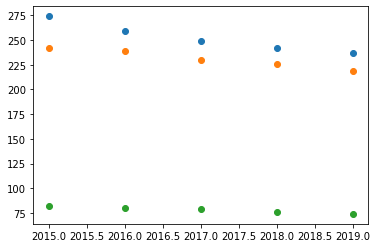

In [22]:
y_values = yearly_transit["THEYEAR"]
x_values = yearly_transit["CTA_BUS"]
plt.scatter(yearly_transit["THEYEAR"], yearly_transit["CTA_BUS"])
plt.scatter(yearly_transit["THEYEAR"], yearly_transit["CTA_RAIL"])
plt.scatter(yearly_transit["THEYEAR"], yearly_transit["METRA"])
plt.show()

In [10]:
#cta_df = pd.merge(cta_bus_df, cta_rail_df, on="YEAR")

In [11]:
#cta_df

,ROUTE,MONTH_x,YEAR,DAY_TYPE_ID_x,AVG_RIDES,NAME,RIDERSHIP_ID,MONTH_y,DAY_TYPE_ID_y,TOTAL_RIDES,DAILY_AVG_RIDES
0,0,4.0,2020.0,WK,1340.0,18th,830,1,WK,36372.0,1653
1,0,4.0,2020.0,WK,1340.0,18th,830,1,SUN,3193.0,638
2,0,4.0,2020.0,WK,1340.0,18th,830,1,SAT,3712.0,928
3,0,4.0,2020.0,WK,1340.0,35-Bronzeville-IIT,1120,1,WK,32031.0,727
4,0,4.0,2020.0,WK,1340.0,35-Bronzeville-IIT,1120,1,SUN,2159.0,215
...,...,...,...,...,...,...,...,...,...,...,...
100093951,X98,1.0,2015.0,WK,10.0,Western-Ravenswood,1480,12,SUN,8354.0,1670
100093952,X98,1.0,2015.0,WK,10.0,Western-Ravenswood,1480,12,SAT,10808.0,2702
100093953,X98,1.0,2015.0,WK,10.0,Wilson,540,12,WK,117877.0,2679
100093954,X98,1.0,2015.0,WK,10.0,Wilson,540,12,SUN,11727.0,1172
